In [1]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading the data

df = pd.read_csv('Diwali_Sales_Data.csv', encoding= 'unicode_escape')

In [121]:
#checking if the data is loaded successfully or not
#this function will display top 5 rows in the dataset

df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,AOV
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,23952.000000
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,7978.000000
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,7974.666667
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,11956.000000
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,11938.500000


In [4]:
#it will display (total rows, columns)

df.shape

(11251, 15)

In [5]:
#it will give all the necessary information about our dataset like its datatypes, values in it are null or not

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#this will remove the unwanted columns from the dataset because of inplace

df.drop(['Status', 'unnamed1'], axis = 1, inplace= True)

In [7]:
#confirming by info function

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
#checking i there is any null value means is there any empty cell in the dataset for any column

pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#this will drope all rows which has null value means it has any empty cell from the dataset beacause of inplace

df.dropna(inplace = True)

In [10]:
#confirming by shape function

df.shape

(11239, 13)

In [11]:
#it will give the mathematical description for all the columns that has numeric datatypes

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [12]:
#it will give the mathematical description for the specific columns that are mentioned

df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [13]:
#to genrate all the column name in the dataset to use it in the function

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
df['Orders'].sum()

27981

### By Gender :

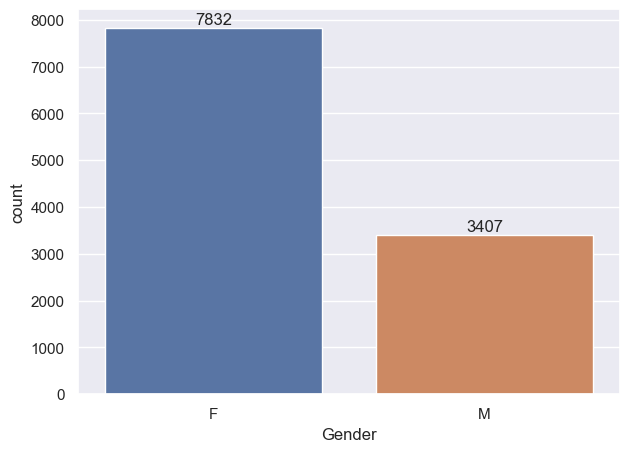

In [16]:
#genrating countplot to show the total number of entries by Gender

sns.set(rc={'figure.figsize':(7,5)})
EntByGen = sns.countplot(x = 'Gender', data = df, hue = 'Gender')

for bars in EntByGen.containers:
    EntByGen.bar_label(bars)

In [17]:
#this will sum all the Orders("['Orders'].sum()") based on gender(".groupby(['Gender'], as_index = False)")

df.groupby(['Gender'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)

,Gender,Orders
0,F,19548
1,M,8433


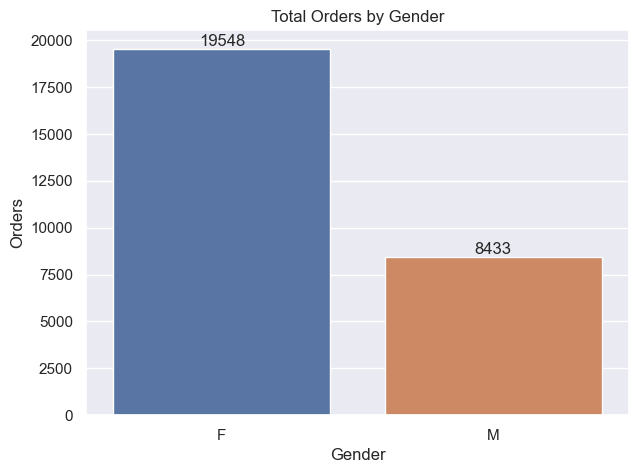

In [18]:
#genrating barplot to show the total number of order by gender
#genrating barplot based on data that we have from above.
#("hue = 'Gender',legend=False, palette='viridis'") this is just to use different color in bars.(optional) 
#other process are just for displaying data label(optional).

SalesByGen = df.groupby(['Gender'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)

sns.set(rc={'figure.figsize':(7,5)})
OrdByGen = sns.barplot(x = 'Gender', y = 'Orders', data = SalesByGen, hue = 'Gender')
plt.title('Total Orders by Gender')

for bars in OrdByGen.containers:
    OrdByGen.bar_label(bars)

In [19]:
#this will sum all the amount("['Amount'].sum()") based on gender(".groupby(['Gender'], as_index = False)")

df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


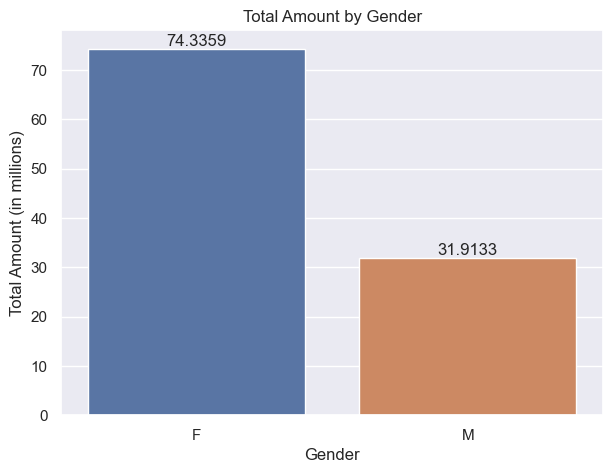

In [20]:
#genrating barplot to show the total amount by gender
#genrating barplot based on data that we have from above.
#("hue = 'Gender',legend=False, palette='viridis'") this is just to use different color in bars.(optional) 
#other process are just for displaying values in millions and displaying data label(optional).

SalesByGen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

SalesByGen['Amount'] = SalesByGen['Amount'] / 1e6

sns.set(rc={'figure.figsize':(7,5)})
AmtByGen = sns.barplot(x = 'Gender', y = 'Amount',data = SalesByGen,hue = 'Gender')
plt.title('Total Amount by Gender')
plt.ylabel('Total Amount (in millions)')

for bars in AmtByGen.containers:
    AmtByGen.bar_label(bars)



*INSIGHTS : From the above graphs, it is clear that females constitute the majority of buyers. Moreover, both the number of orders and the purchasing power of females are higher compared to males.*

### By Age :

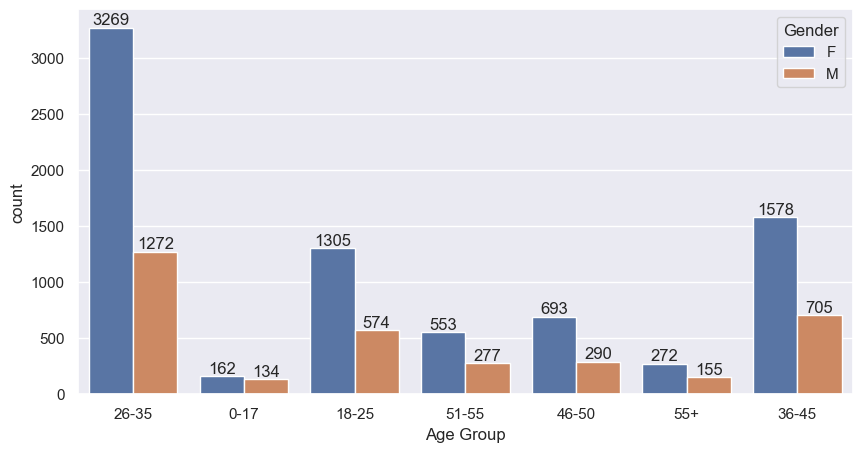

In [23]:
#genrating countplot to show the total number of entries by Age Group

sns.set(rc={'figure.figsize':(10,5)})
EntByAge = sns.countplot(x = 'Age Group', data = df, hue = 'Gender')

for bars in EntByAge.containers:
    EntByAge.bar_label(bars)

In [24]:
#this will sum all the Orders("['Orders'].sum()") based on Age-Group(".groupby(['Age Group'], as_index = False)")

df.groupby(['Age Group'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)

,Age Group,Orders
2,26-35,11395
3,36-45,5687
1,18-25,4650
4,46-50,2371
5,51-55,2112
6,55+,1076
0,0-17,690


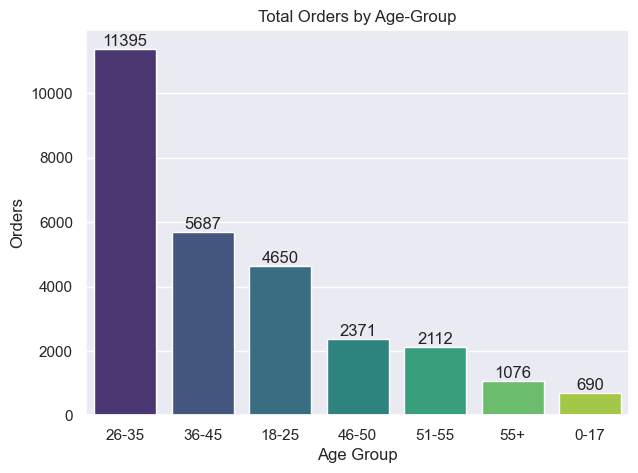

In [25]:
#genrating barplot to show the total number of order by Age-Group
#genrating barplot based on data that we have from above.
#("hue = 'Gender',legend=False, palette='viridis'") this is just to use different color in bars.(optional) 
#other process are just for displaying data label(optional).

SalesByAge = df.groupby(['Age Group'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)

sns.set(rc={'figure.figsize':(7,5)})
OrdByAge = sns.barplot(x = 'Age Group', y = 'Orders', data = SalesByAge, hue = 'Age Group',legend=False, palette='viridis')
plt.title('Total Orders by Age-Group')


for bars in OrdByAge.containers:
    OrdByAge.bar_label(bars)

In [26]:
#this will sum all the amount("['Amount'].sum()") based on Age-Group(".groupby(['Age Group'], as_index = False)")

df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Age Group,Amount
2,26-35,42613443.94
3,36-45,22144995.49
1,18-25,17240732.00
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00
0,0-17,2699653.00


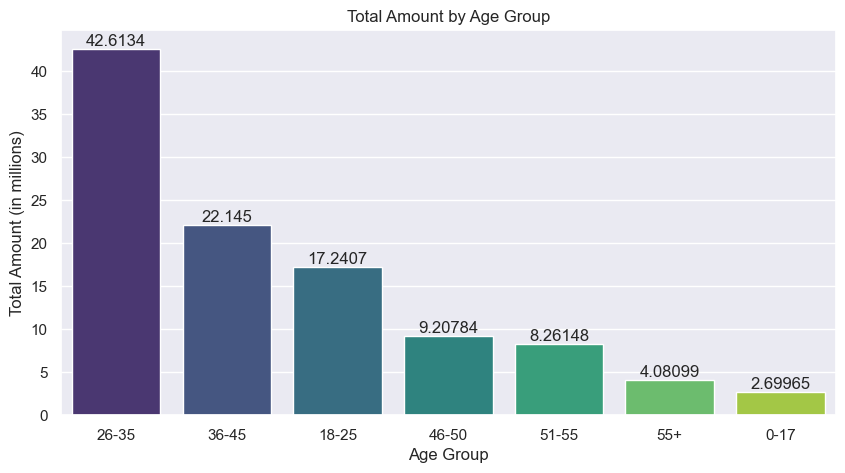

In [27]:
#genrating barplot to show the total amount by Age-Group
#genrating barplot based on data that we have from above.
#("hue = 'Age Group',legend=False, palette='viridis'") this is just to use different color in bars.(optional) 
#other process are just for displaying values in millions and displaying data label(optional).

SalesByAge = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

SalesByAge['Amount'] = SalesByAge['Amount'] / 1e6

sns.set(rc={'figure.figsize':(10,5)})
AmtByAge = sns.barplot(x = 'Age Group', y = 'Amount', data = SalesByAge, hue = 'Age Group',legend=False, palette='viridis')
plt.title('Total Amount by Age Group')
plt.ylabel('Total Amount (in millions)')

for bars in AmtByAge.containers:
    AmtByAge.bar_label(bars)

*INSIGHTS :From the above graphs, it is evident that most buyers are females belonging to the age group of 26-35 years. This age group not only dominates in terms of the number of orders but also exhibits higher purchasing power compared to other age groups.*

### By State :

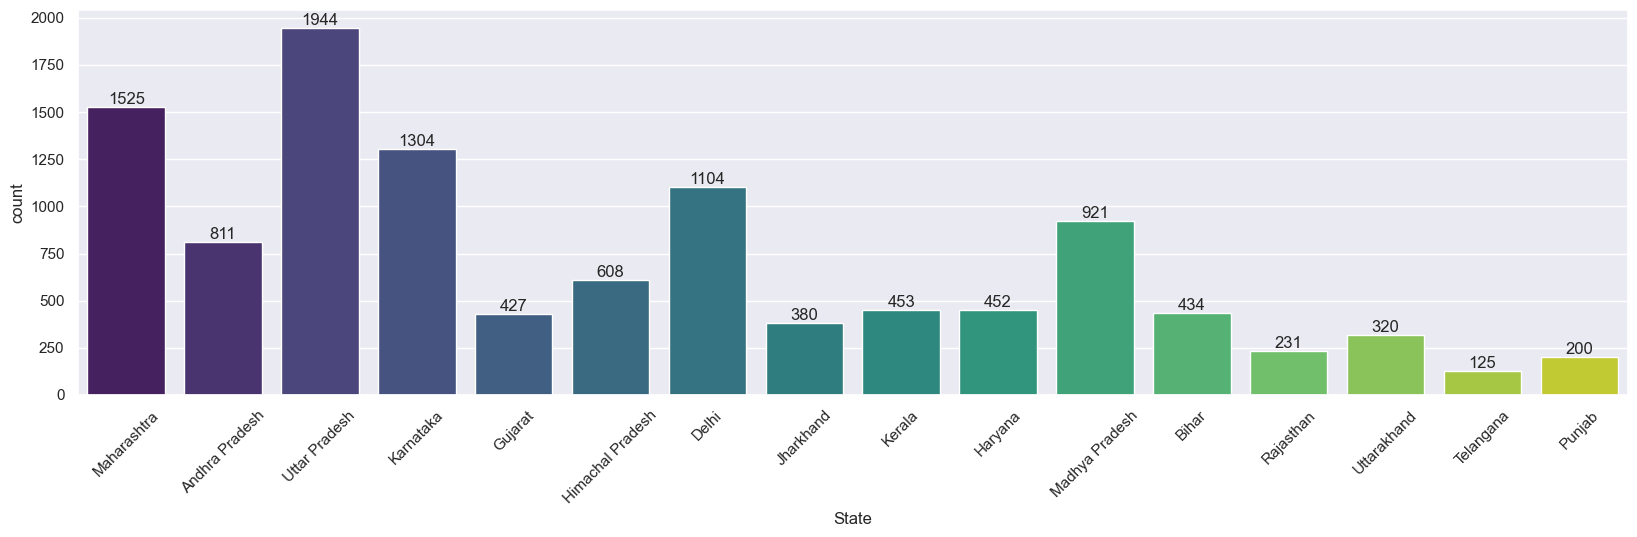

In [75]:
#genrating countplot to show the total number of entries by Age Group

sns.set(rc={'figure.figsize':(20,5)})
EntByState = sns.countplot(x = 'State', data = df, hue = 'State',legend=False, palette='viridis')
plt.xticks(rotation=45)

for bars in EntByState.containers:
    EntByState.bar_label(bars)

In [31]:
#this will sum all the orders("['Orders'].sum()") based on State(".groupby(['State'], as_index = False)")
#it will display only top 10 values beacause of (".head(10)")

df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


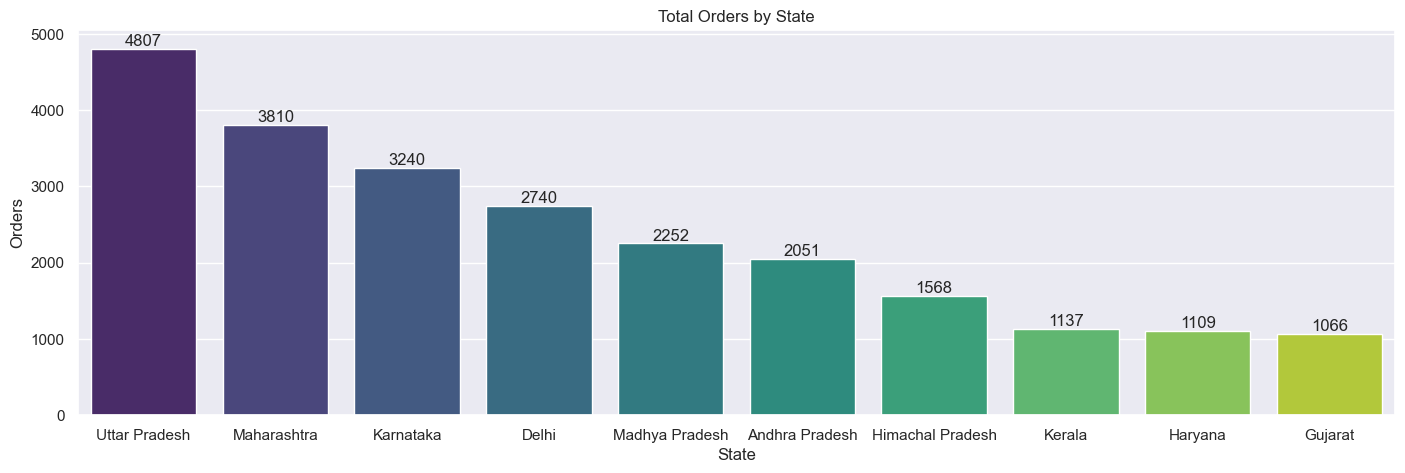

In [32]:
#genrating barplot to show the total number of order by State
#genrating barplot based on data that we have from above.
#("hue = 'State',legend=False, palette='viridis'") this is just to use different color in bars.(optional) 
#other process are just displaying data label(optional).

SalesByState = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
OrdByState = sns.barplot(x = 'State', y = 'Orders', data = SalesByState, hue = 'State',legend=False, palette='viridis')
plt.title('Total Orders by State')

for bars in OrdByState.containers:
    OrdByState.bar_label(bars)

In [33]:
#this will sum all the Amount("['Amount'].sum()") based on State(".groupby(['State'], as_index = False)")
#it will display only top 10 values beacause of (".head(10)")

df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

,State,Amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00
0,Andhra Pradesh,8037146.99
5,Himachal Pradesh,4963368.00
4,Haryana,4220175.00
1,Bihar,4022757.00
3,Gujarat,3946082.00


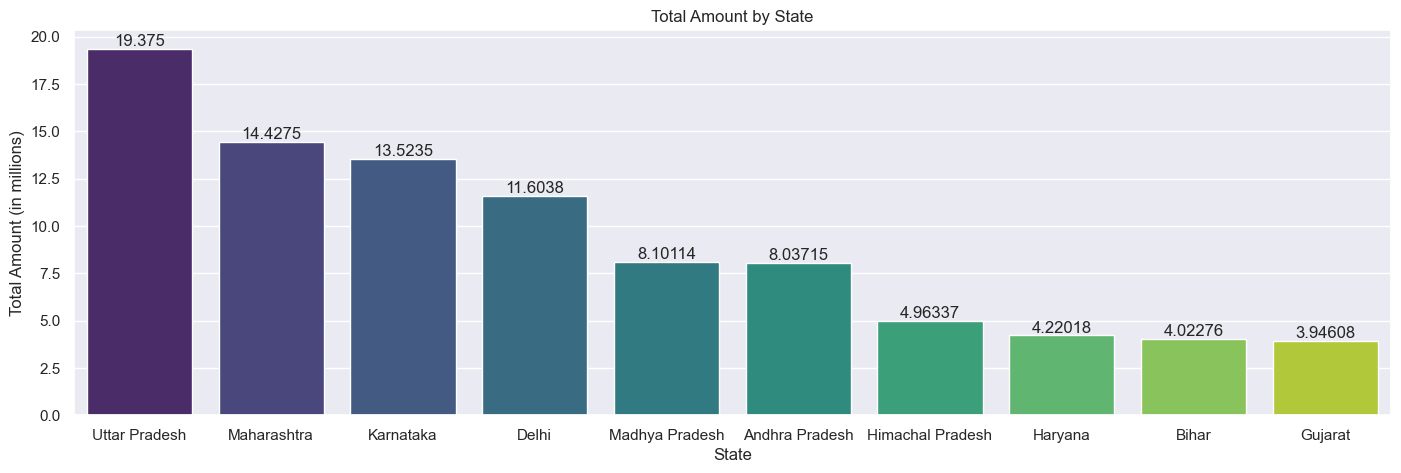

In [34]:
#genrating barplot to show the total amount by State.
#genrating barplot based on data that we have from above.
#("hue = 'State',legend=False, palette='viridis'") this is just to use different color in bars.(optional) 
#other process are just for displaying values in millions and displaying data label(optional).

SalesByState = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

SalesByState['Amount'] = SalesByState['Amount'] / 1e6

sns.set(rc={'figure.figsize':(17,5)})
AmtByState = sns.barplot(x = 'State', y = 'Amount', data = SalesByState, hue = 'State',legend=False, palette='viridis')
plt.title('Total Amount by State')
plt.ylabel('Total Amount (in millions)')

for bars in AmtByState.containers:
    AmtByState.bar_label(bars)

INSIGHTS : From the above graphs, it is evident that most buyers come from the top three states: 

1. Uttar Pradesh
2. Maharashtra
3. Karnataka.

These states also exhibit the highest number of orders and total purchase amounts in that order.


However, there are notable exceptions when examining specific states:

1. Haryana has fewer orders compared to Kerala, yet its total purchase amount surpasses that of Kerala.
2. Kerala's total purchase amount is significantly lower than Bihar and Gujarat.

### By marital Status :

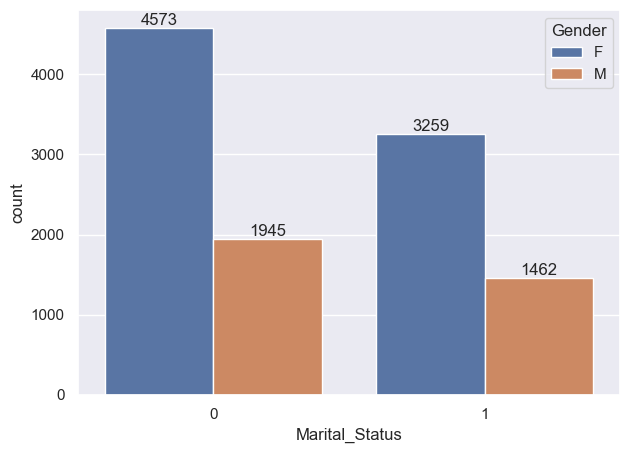

In [37]:
#genrating countplot to show the total number of entries by marital status
#Here 0 means unmarried or single
#and 1 means married

sns.set(rc={'figure.figsize':(7,5)})
EntByMarital = sns.countplot(x = 'Marital_Status', data = df, hue = 'Gender')

for bars in EntByMarital.containers:
    EntByMarital.bar_label(bars)

In [38]:
#this will sum all the orders("['Orders'].sum()") based on Marital-Status(".groupby(['Marital_Status'], as_index = False)")

df.groupby(['Marital_Status'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)

,Marital_Status,Orders
0,0,16249
1,1,11732


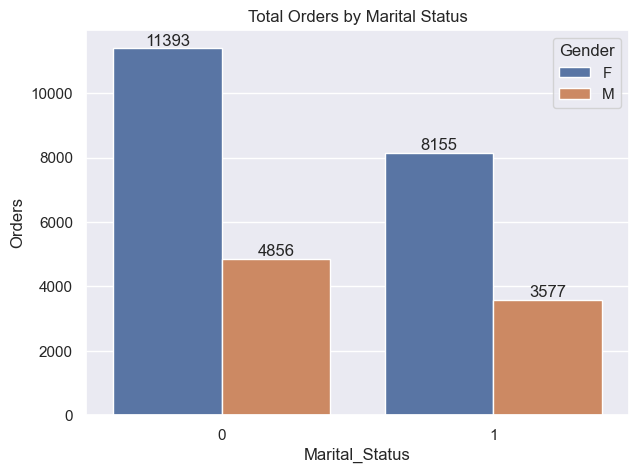

In [39]:
#genrating barplot to show the total number of order by Marital Status
#genrating barplot based on data that we have from above.
#("hue = 'Marital_Status',legend=False, palette='viridis'") this is just to use different color in bars.(optional) 
#other process are just for displaying data label(optional).

sns.set(rc={'figure.figsize':(7,5)})
SalesByMarital = df.groupby(['Marital_Status','Gender'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)

OrdByMarital = sns.barplot(x = 'Marital_Status', y = 'Orders', data = SalesByMarital, hue = 'Gender')
plt.title('Total Orders by Marital Status')

for bars in OrdByMarital.containers:
    OrdByMarital.bar_label(bars)

In [40]:
#this will sum all the Amount("['Amount'].sum()") based on Marital-Status(".groupby(['Marital_Status'], as_index = False)")

df.groupby(['Marital_Status'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Marital_Status,Amount
0,0,62125386.44
1,1,44123745.99


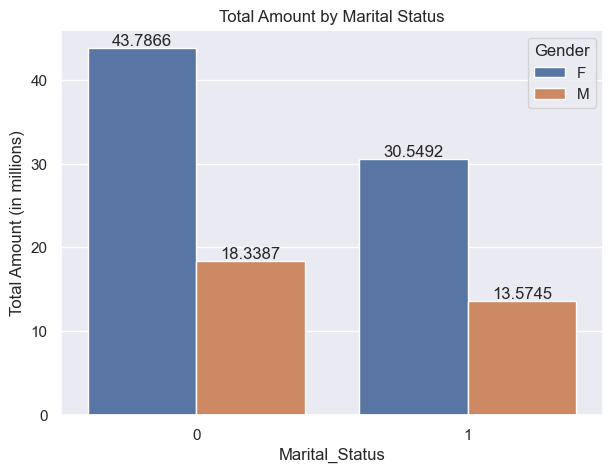

In [41]:
#genrating barplot to show the total amount by Marital-Status.
#genrating barplot based on data that we have from above.
#("hue = 'Marital_Status',legend=False, palette='viridis'") this is just to use different color in bars.(optional) 
#other process are just for displaying values in millions and displaying data label(optional).

SalesByMarital = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

SalesByMarital['Amount'] = SalesByMarital['Amount'] / 1e6

sns.set(rc={'figure.figsize':(7,5)})
AmtByMarital = sns.barplot(x = 'Marital_Status', y = 'Amount', data = SalesByMarital, hue = 'Gender')
plt.title('Total Amount by Marital Status')
plt.ylabel('Total Amount (in millions)')

for bars in AmtByMarital.containers:
    AmtByMarital.bar_label(bars)

INSIGHTS : From the above graphs, we can see that most of the buyers are unmarried females. Additionally, both the number of orders and the purchasing power are higher for unmarried individuals compared to married individuals.

### By Occupation :

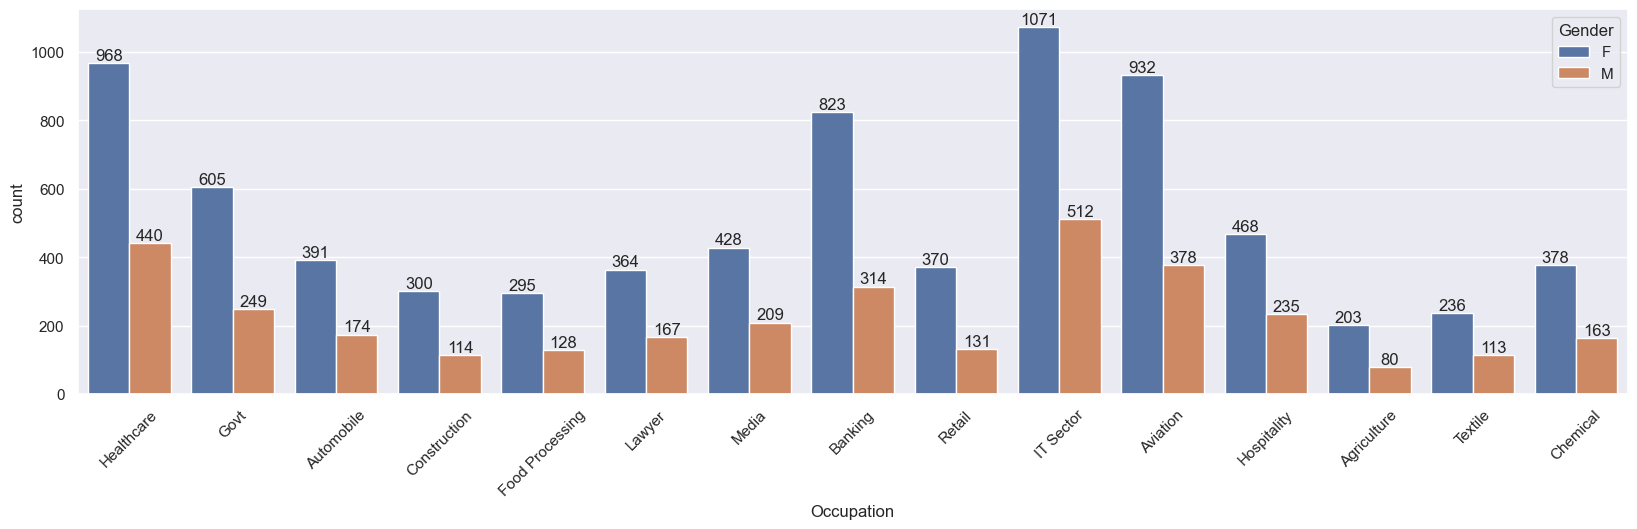

In [71]:
#genrating countplot to show the total number of entries by Occupation

sns.set(rc={'figure.figsize':(20,5)})
EntByOcp = sns.countplot(x = 'Occupation', data = df, hue = 'Gender')
plt.xticks(rotation=45)

for bars in EntByOcp.containers:
    EntByOcp.bar_label(bars)

In [45]:
#this will sum all the orders("['Orders'].sum()") based on Occupation(".groupby(['Occupation'], as_index = False)")

df.groupby(['Occupation'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)

,Occupation,Orders
10,IT Sector,3997
8,Healthcare,3455
2,Aviation,3215
3,Banking,2817
7,Govt,2155
9,Hospitality,1739
12,Media,1596
1,Automobile,1371
11,Lawyer,1344
4,Chemical,1309


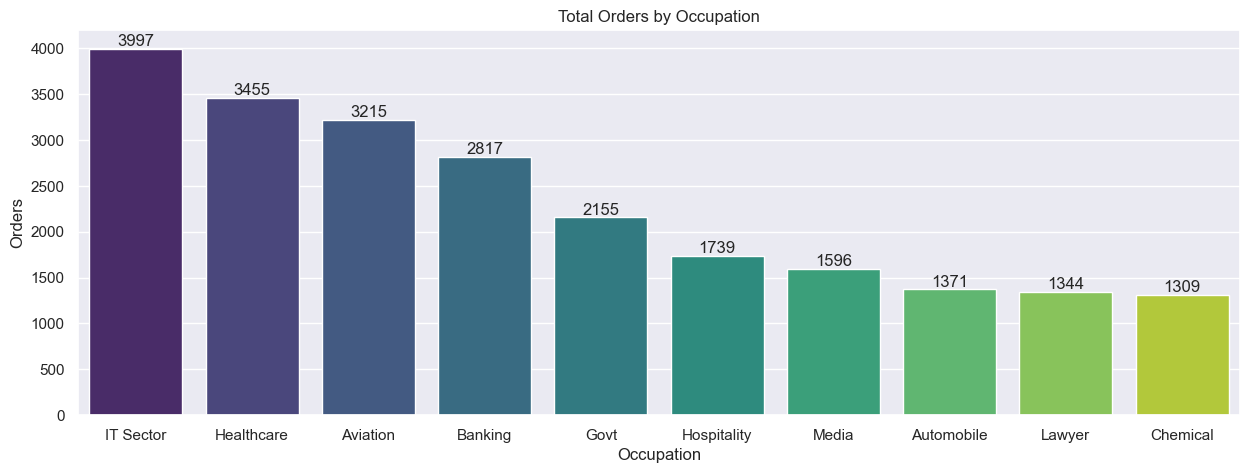

In [46]:
#genrating barplot to show the total number of order by Occupation
#genrating barplot based on data that we have from above.
#("hue = 'Occupation',legend=False, palette='viridis'") this is just to use different color in bars.(optional) 
#other process are just for displaying data label(optional).

sns.set(rc={'figure.figsize':(15,5)})
SalesByOcp = df.groupby(['Occupation'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

OrdByOcp = sns.barplot(x = 'Occupation', y = 'Orders', data = SalesByOcp, hue = 'Occupation',legend=False, palette='viridis')
plt.title('Total Orders by Occupation')

for bars in OrdByOcp.containers:
    OrdByOcp.bar_label(bars)

In [47]:
#this will sum all the Amount("['Amount'].sum()") based on Occupation(".groupby(['Occupation'], as_index = False)")

df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Occupation,Amount
10,IT Sector,14755079.00
8,Healthcare,13034587.49
2,Aviation,12602298.00
3,Banking,10770610.95
7,Govt,8517212.00
9,Hospitality,6376405.00
12,Media,6295832.99
1,Automobile,5368596.00
4,Chemical,5297436.00
11,Lawyer,4981665.00


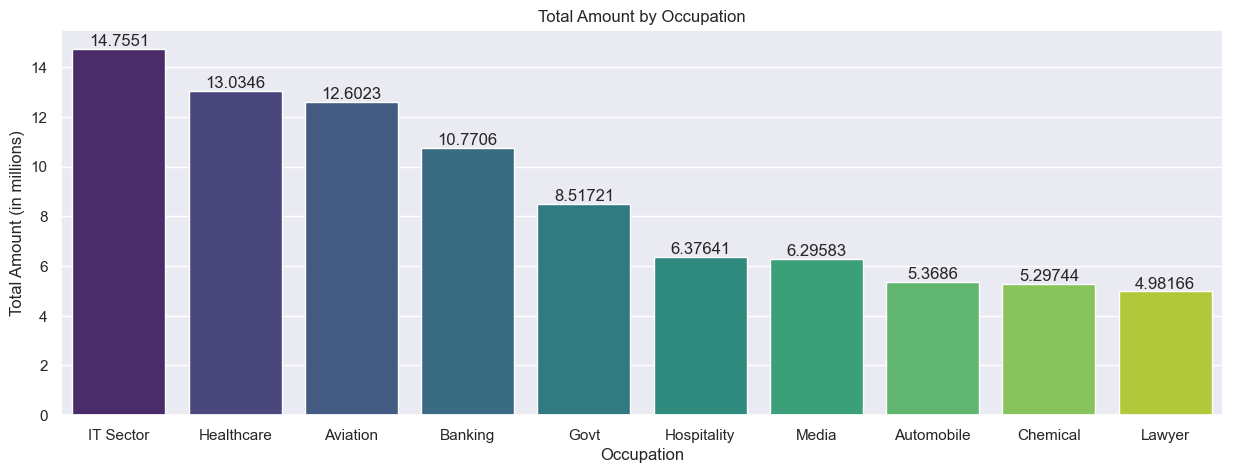

In [48]:
#genrating barplot to show the total amount by Occupation.
#genrating barplot based on data that we have from above.
#("hue = 'Occupation',legend=False, palette='viridis'") this is just to use different color in bars.(optional) 
#other process are just for displaying values in millions and displaying data label(optional).

SalesByOcp = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

SalesByOcp['Amount'] = SalesByOcp['Amount'] / 1e6

sns.set(rc={'figure.figsize':(15,5)})
AmtByOcp = sns.barplot(x = 'Occupation', y = 'Amount', data = SalesByOcp, hue = 'Occupation',legend=False, palette='viridis')
plt.title('Total Amount by Occupation')
plt.ylabel('Total Amount (in millions)')

for bars in AmtByOcp.containers:
    AmtByOcp.bar_label(bars)

INSIGHTS : From the above graphs, we can see that most of the buyers are from the following top 3 occupation fields:

1. IT Sector
2. Healthcare
3. Aviation


These occupation fields also have the highest number of orders and purchasing power compared to other occupation fields. Additionally, there are certain differences within particular occupation fields where:

The number of orders is lower, but the total amount spent is higher.
Conversely, the number of orders is higher, but the total amount spent is lower.


This indicates varying purchasing behaviors and spending capacities across different occupation fields.


### By Product Category:

In [51]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

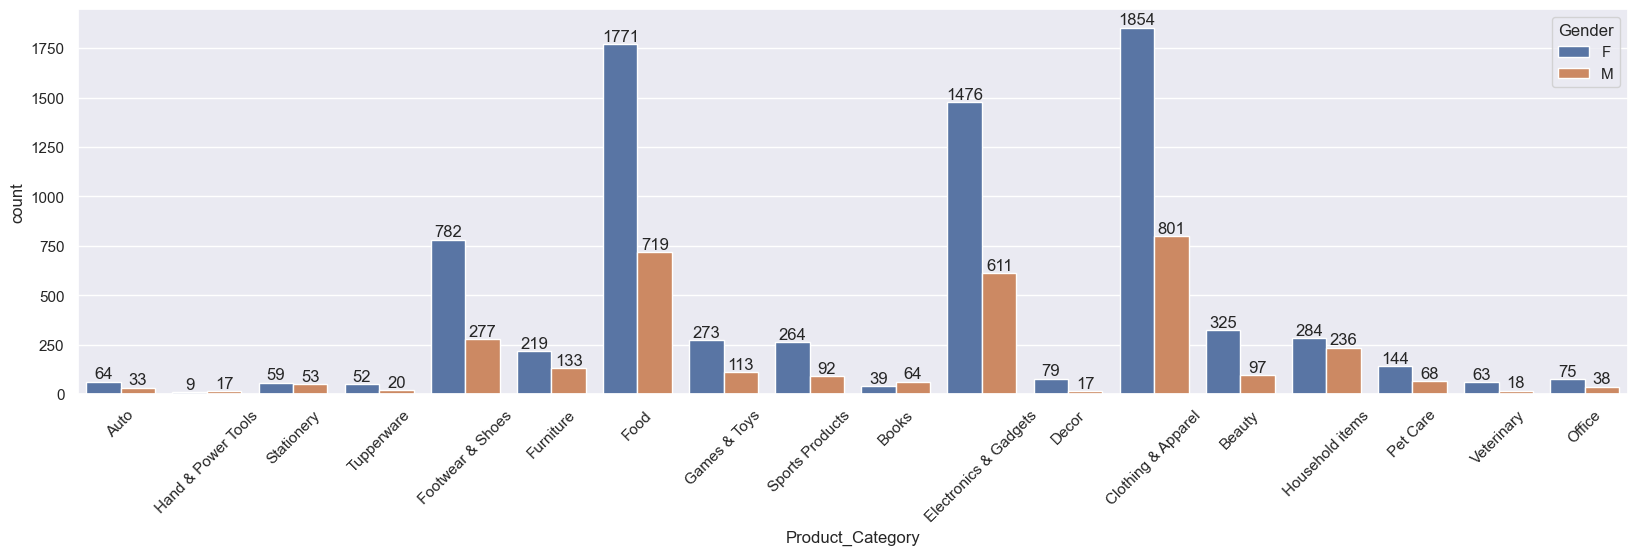

In [69]:
#genrating countplot to show the total number of entries by Product Category

sns.set(rc={'figure.figsize':(20,5)})
EntByPdc = sns.countplot(x = 'Product_Category', data = df, hue = 'Gender')
plt.xticks(rotation=45)

for bars in EntByPdc.containers:
    EntByPdc.bar_label(bars)

In [53]:
#this will sum all the orders("['Orders'].sum()") based on Product Category(".groupby(['Product_Category'], as_index = False)")

df.groupby(['Product_Category'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

,Product_Category,Orders
3,Clothing & Apparel,6634
6,Food,6110
5,Electronics & Gadgets,5226
7,Footwear & Shoes,2646
11,Household items,1331
1,Beauty,1086
9,Games & Toys,940
8,Furniture,889
14,Sports Products,870
13,Pet Care,536


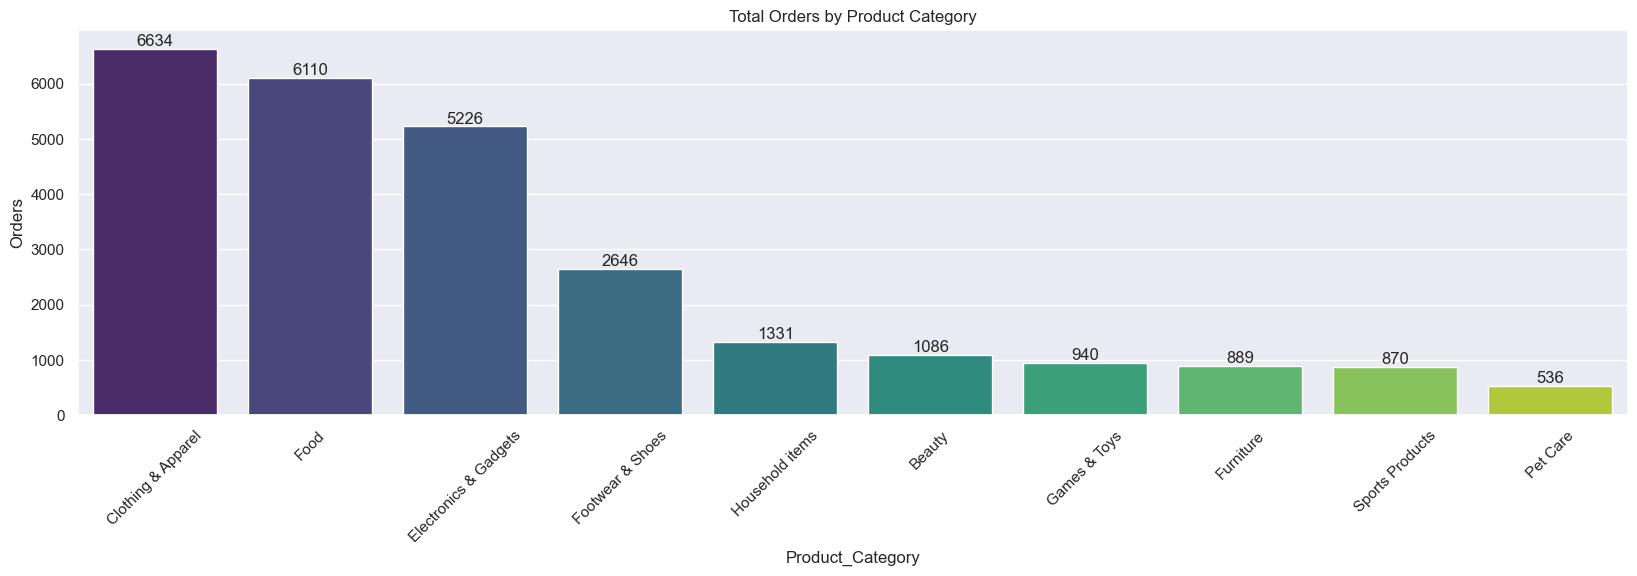

In [65]:
#genrating barplot to show the total number of order by Product_Category
#genrating barplot based on data that we have from above.
#("hue = 'Product_Category',legend=False, palette='viridis'") this is just to use different color in bars.(optional) 
#other process are just for displaying data label(optional).

sns.set(rc={'figure.figsize':(20,5)})
SalesByPdc = df.groupby(['Product_Category'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

OrdByPdc = sns.barplot(x = 'Product_Category', y = 'Orders', data = SalesByPdc, hue = 'Product_Category',legend=False, palette='viridis')
plt.title('Total Orders by Product Category')
plt.xticks(rotation=45)

for bars in OrdByPdc.containers:
    OrdByPdc.bar_label(bars)

In [55]:
#this will sum all the Amount("['Amount'].sum()") based on Product Category(".groupby(['Product_Category'], as_index = False)")

df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16495019.00
5,Electronics & Gadgets,15643846.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1958609.99
15,Stationery,1676051.50


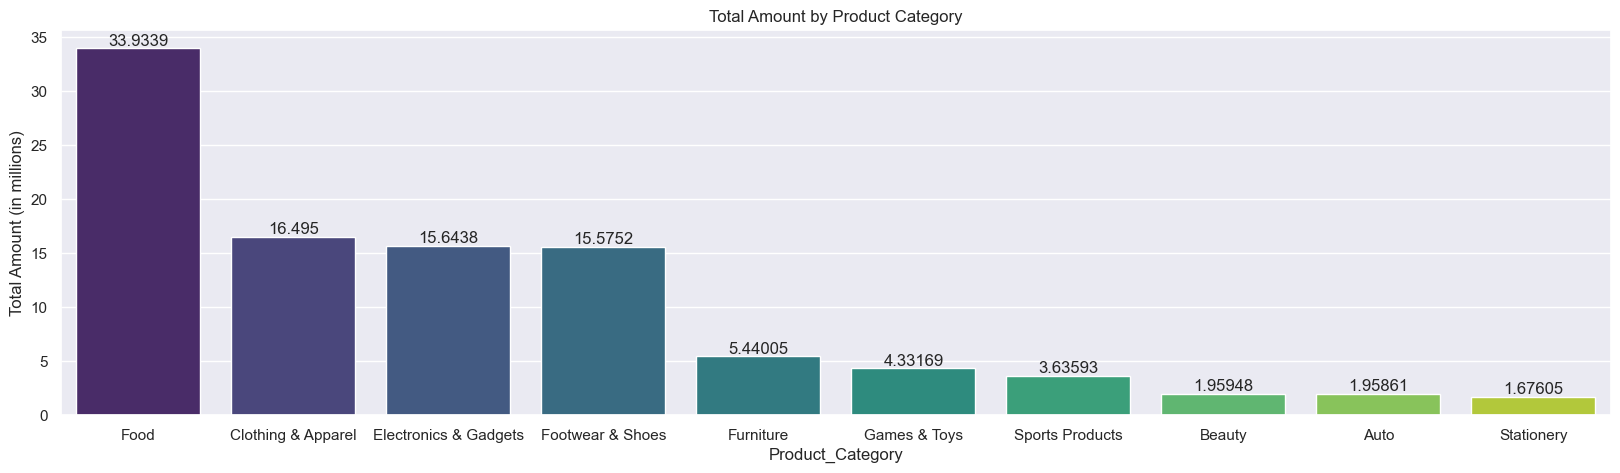

In [56]:
#genrating barplot to show the total amount by Product Category.
#genrating barplot based on data that we have from above.
#("hue = 'Product_Category',legend=False, palette='viridis'") this is just to use different color in bars.(optional) 
#other process are just for displaying values in millions and displaying data label(optional).

SalesByPdc = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

SalesByPdc['Amount'] = SalesByPdc['Amount'] / 1e6

sns.set(rc={'figure.figsize':(20,5)})
AmtByPdc = sns.barplot(x = 'Product_Category', y = 'Amount', data = SalesByPdc, hue = 'Product_Category',legend=False, palette='viridis')
plt.title('Total Amount by Product Category')
plt.ylabel('Total Amount (in millions)')

for bars in AmtByPdc.containers:
    AmtByPdc.bar_label(bars)

INSIGHTS : From the graphs, we can see that most of the buyers are females, and they primarily order from the following top 3 product categories:

1. Clothing & Apparel
2. Electronics & Gadgets
3. Food


However, the number of orders is highest in the following product categories:

1. Clothing & Apparel
2. Food
3. Electronics & Gadgets


And the total amount spent is highest in the following product categories:

1. Food
2. Clothing & Apparel
3. Electronics & Gadgets

### EXTRA :

In [63]:
# Calculate AOV (Average Order Value) and add it as a new column
df['AOV'] = df['Amount'] / df['Orders']

# Save the updated data back to the same CSV file, overwriting the existing data
df.to_csv('Diwali_Sales_Data.csv', index=False)

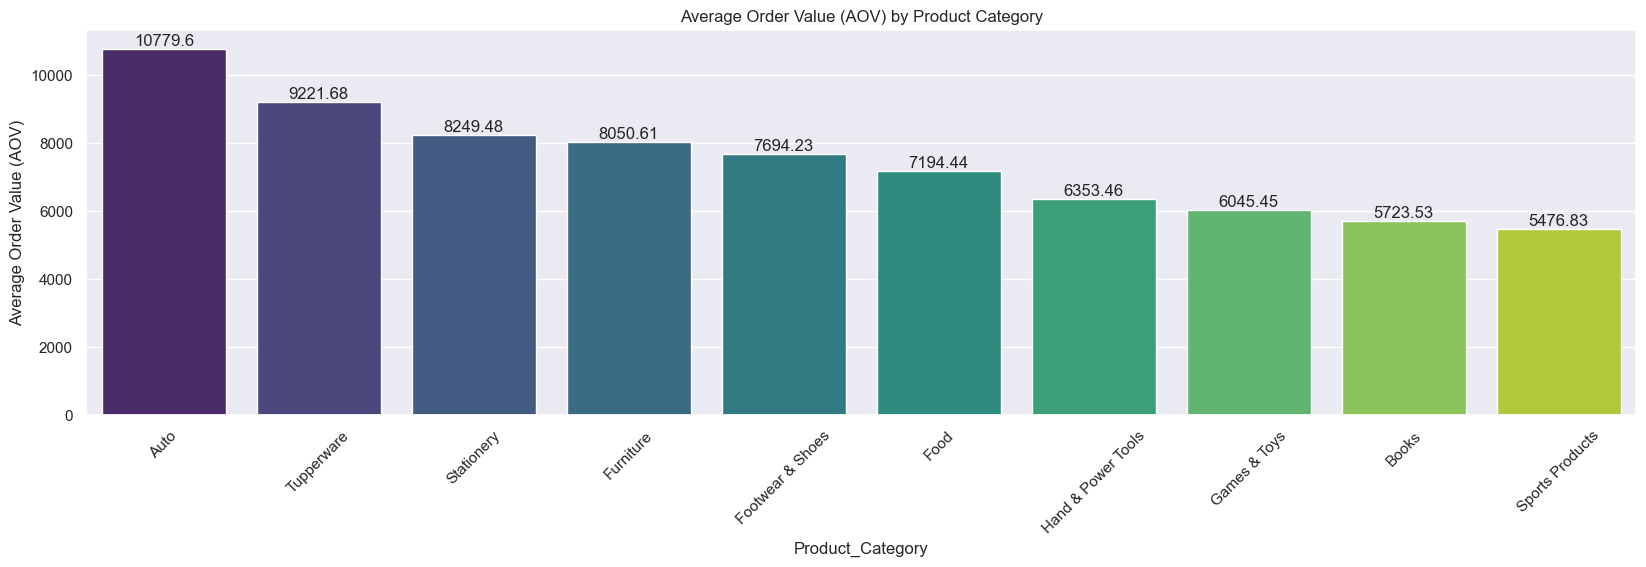

In [81]:
#Compare the AOV across different product categories.

CatByAOV = df.groupby(['Product_Category'], as_index = False)['AOV'].mean().sort_values(by = 'AOV', ascending = False).head(10)

#CatByAOV['AOV'] = CatByAOV['AOV'] / 1e6

sns.set(rc={'figure.figsize':(20,5)})
AOVByPdc = sns.barplot(x = 'Product_Category', y = 'AOV', data = CatByAOV, hue = 'Product_Category',legend=False, palette='viridis')
plt.title('Average Order Value (AOV) by Product Category')
plt.ylabel('Average Order Value (AOV)')
plt.xticks(rotation=45)

for bars in AOVByPdc.containers:
    AOVByPdc.bar_label(bars)

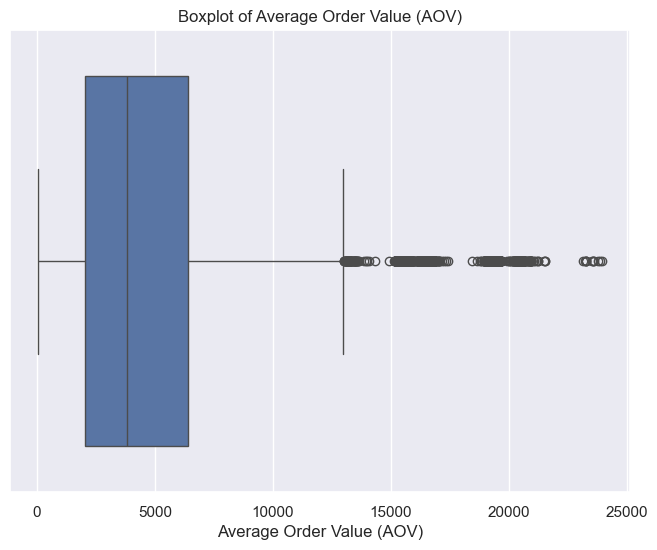

In [85]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['AOV'])
plt.title('Boxplot of Average Order Value (AOV)')
plt.xlabel('Average Order Value (AOV)')
plt.show()

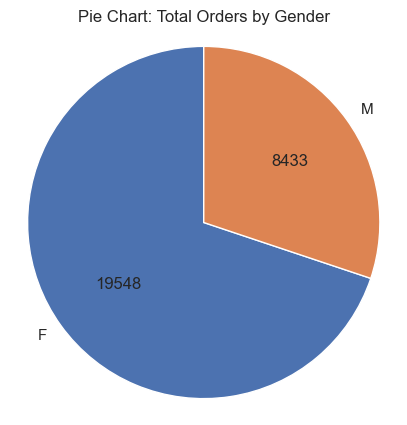

In [117]:
SalesByGen = df.groupby(['Gender'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)

#sns.set(rc={'figure.figsize':(7,5)})
#OrdByGen = sns.barplot(x = 'Gender', y = 'Orders', data = SalesByGen, hue = 'Gender')
#plt.title('Total Orders by Gender')

#for bars in OrdByGen.containers:
 #   OrdByGen.bar_label(bars)

plt.figure(figsize=(5, 5))
plt.pie(SalesByGen['Orders'], labels=SalesByGen['Gender'], autopct=lambda p: f'{p * sum(SalesByGen['Orders']) / 100:.0f}', startangle=90)
plt.title('Pie Chart: Total Orders by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

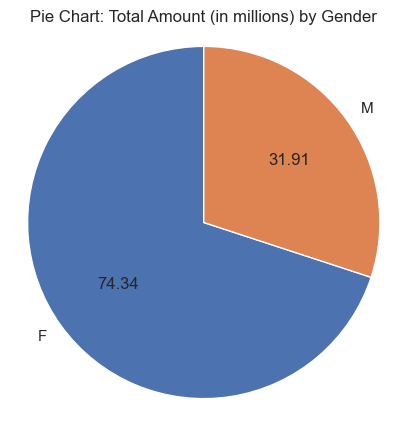

In [111]:
SalesByGen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

SalesByGen['Amount'] = SalesByGen['Amount'] / 1e6

plt.figure(figsize=(5, 5))
plt.pie(SalesByGen['Amount'], labels=SalesByGen['Gender'], autopct=lambda p: f'{p * sum(SalesByGen['Amount']) / 100:.2f}', startangle=90)
plt.title('Pie Chart: Total Amount (in millions) by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()